In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Regular EDA and plotting libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import compress_fasttext

In [ ]:
# Models from sklearn
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Model Evaluations
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay as plot_roc_curve
from sklearn.preprocessing import OneHotEncoder
import catboost

## Load data

In [ ]:
import os
os.chdir('/content/drive/My Drive/')

In [ ]:
dataset_path = "../data/raw/preproceced_data_vacancies.csv"
df = pd.read_csv(dataset_path)

# Modeling

In [ ]:
# Split data into X and Y from the first data transform
X = df.drop('best_matching_job', axis=1)

y = df['best_matching_job']

In [ ]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Testing for Catboost

In [ ]:
from catboost import Pool
train_pool = Pool(data=X_train, label=y_train)
test_pool = Pool(data=X_test, label=y_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 32.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


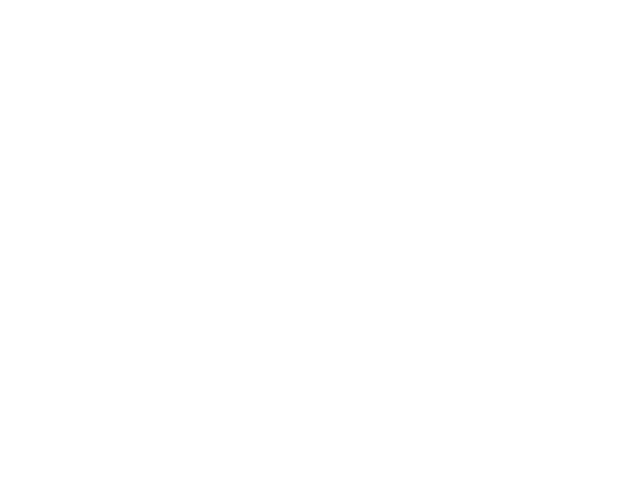

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
catboost_params = {
    'iterations': 2000,
    'learning_rate': 0.1,
    'loss_function': 'MAE'
}
catboost_model = CatBoostRegressor(**catboost_params)
catboost_model.fit(train_pool, eval_set=test_pool,
              silent=True,
              plot=True)

In [ ]:
# Evaluate the model using default metrics and MAPE
eval_result = catboost_model.eval_metrics(test_pool, ['RMSE', 'MAE', 'MAPE'])
print(f"RMSE: {eval_result['RMSE'][-1]:.4f}")
print(f"MAE: {eval_result['MAE'][-1]:.4f}")
pr int(f"MAPE: {eval_result['MAPE'][-1]:.4f}%")

RMSE: 31707.9307
MAE: 15769.5911
MAPE: 0.1528%


# Training for other models

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor

# Define the parameter grids for each model
linear_params = {'fit_intercept': [True, False]}
ridge_params = {'alpha': [0.1, 1.0, 10.0], 'fit_intercept': [True, False]}
knn_params = {'n_neighbors': [3, 5, 7]}
catboost_params = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [6, 8, 10],
    'loss_function': ['MAE'],
}

# Create instances of the models
linear_regression = LinearRegression()
ridge_regression = Ridge()
knn_model = KNeighborsRegressor()
catboost_model = CatBoostRegressor()

# Create dictionaries for models and their corresponding parameter grids
models = {
    'Linear Regression': (linear_regression, linear_params),
    'Ridge Regression': (ridge_regression, ridge_params),
    'KNN': (knn_model, knn_params),
    'CatBoost': (catboost_model, catboost_params)
}

# Perform grid search for each model
best_models = {}
for model_name, (model_instance, param_grid) in models.items():
    grid_search = GridSearchCV(model_instance, param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    # Print the best parameters for each model
    print(f"Best {model_name} Parameters:", grid_search.best_params_)
"""cat_model.fit(train_dataset,
              eval_set=train_dataset,
              silent=True,
              plot=True,)
train_dataset = cb.Pool(X_train,
                        label=y_train,
                        cat_features=[1, 2, 3, 4],
                        text_features=[0, 5])
              """
# Now, best_models contains the models with the best hyperparameters
# You can use these models for further evaluation or predictions


Best Linear Regression Parameters: {'fit_intercept': True}
Best Ridge Regression Parameters: {'alpha': 10.0, 'fit_intercept': False}


KeyboardInterrupt: ignored

In [ ]:
print(best_models)

{'Linear Regression': LinearRegression(), 'Ridge Regression': Ridge(alpha=10.0, fit_intercept=False), 'KNN': KNeighborsRegressor(n_neighbors=7), 'CatBoost': <catboost.core.CatBoostRegressor object at 0x7f17ef95c940>}


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor

def train_models(models, X_train, y_train):
    trained_models = {}

    for model_name, model_instance in models.items():
        # Train the model
        model_instance.fit(X_train, y_train)
        # Save the trained model to the dictionary
        trained_models[model_name] = model_instance

    return trained_models

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=10.0, fit_intercept=False),
    'KNN': KNeighborsRegressor(n_neighbors=7),
    'CatBoost': CatBoostRegressor(iterations= 2000, learning_rate= 0.1, loss_function= 'MAE',eval_set=, early_stopping_rounds=10 )#catboost.pool
}
trained_models = train_models(models, X_train, y_train)

0:	learn: 33923.0898880	total: 8.05ms	remaining: 16.1s
1:	learn: 31717.9826180	total: 23.1ms	remaining: 23.1s
2:	learn: 29875.5069817	total: 38.2ms	remaining: 25.4s
3:	learn: 28455.5089639	total: 47ms	remaining: 23.4s
4:	learn: 27105.1067214	total: 57.4ms	remaining: 22.9s
5:	learn: 25909.5915694	total: 88.3ms	remaining: 29.4s
6:	learn: 24904.7089845	total: 107ms	remaining: 30.4s
7:	learn: 23931.1922116	total: 115ms	remaining: 28.7s
8:	learn: 23084.7044560	total: 122ms	remaining: 27s
9:	learn: 22440.8530504	total: 137ms	remaining: 27.3s
10:	learn: 21887.1141320	total: 148ms	remaining: 26.7s
11:	learn: 21359.0596033	total: 166ms	remaining: 27.4s
12:	learn: 20879.4900073	total: 190ms	remaining: 29s
13:	learn: 20450.1647299	total: 214ms	remaining: 30.4s
14:	learn: 20075.6368044	total: 235ms	remaining: 31.1s
15:	learn: 19738.4043169	total: 247ms	remaining: 30.6s
16:	learn: 19450.6266909	total: 255ms	remaining: 29.7s
17:	learn: 19239.9744876	total: 269ms	remaining: 29.7s
18:	learn: 19051.699

## Modeling Function

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_models(trained_models, X_test, y_test):
    results = {}

    for model_name, model_instance in trained_models.items():
        predictions = model_instance.predict(X_test)

        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        mape = mean_absolute_percentaje_error(y_test, predictions)

        results[model_name] = {
            'Mean Squared Error': mse,
            'R-squared': r2,
            'MAPE': mape
        }

        print(f'{model_name} Metrics:')
        print(f'  Mean Squared Error: {mse}')
        print(f'  R-squared: {r2}')
        print(f'  MAPE: {mape}\n')

    return results

results = evaluate_models(trained_models, X_test, y_test)

Linear Regression Metrics:
  Mean Squared Error: 1074979117.486018
  R-squared: 0.6113274601216456
  MAPE: 18759.997217226864

Ridge Regression Metrics:
  Mean Squared Error: 1075091818.3157027
  R-squared: 0.6112867116856923
  MAPE: 18763.199633495442

KNN Metrics:
  Mean Squared Error: 997287533.7113217
  R-squared: 0.6394178524852683
  MAPE: 17400.36170017863

CatBoost Metrics:
  Mean Squared Error: 941053548.7862868
  R-squared: 0.659749973726292
  MAPE: 15409.407620736505



## Metric plots

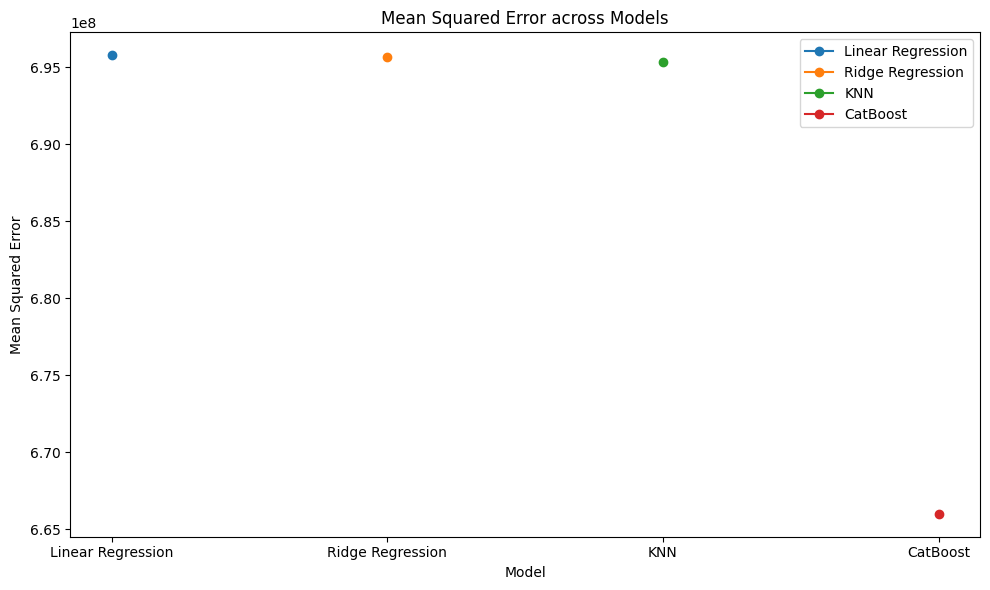

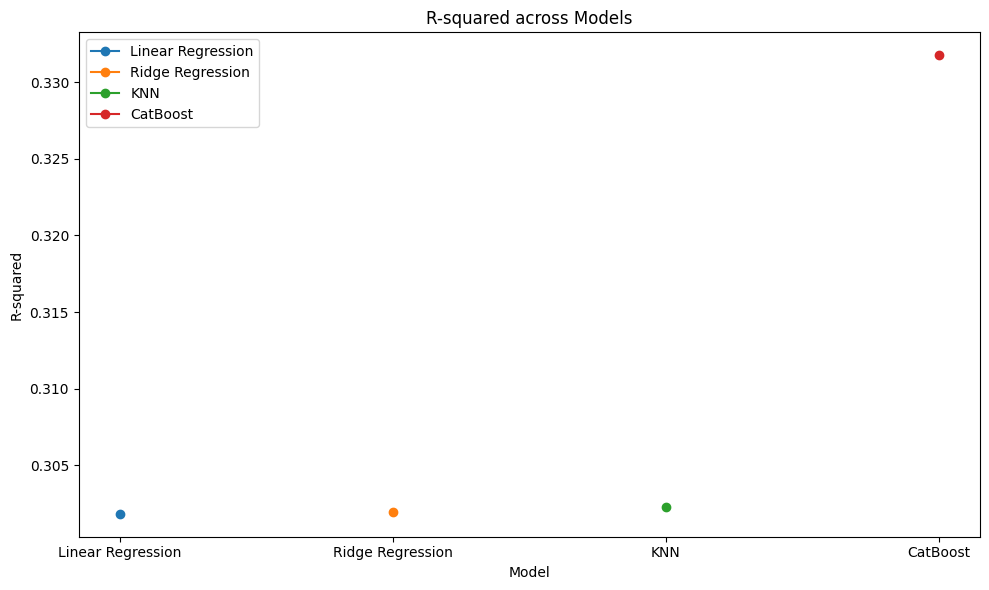

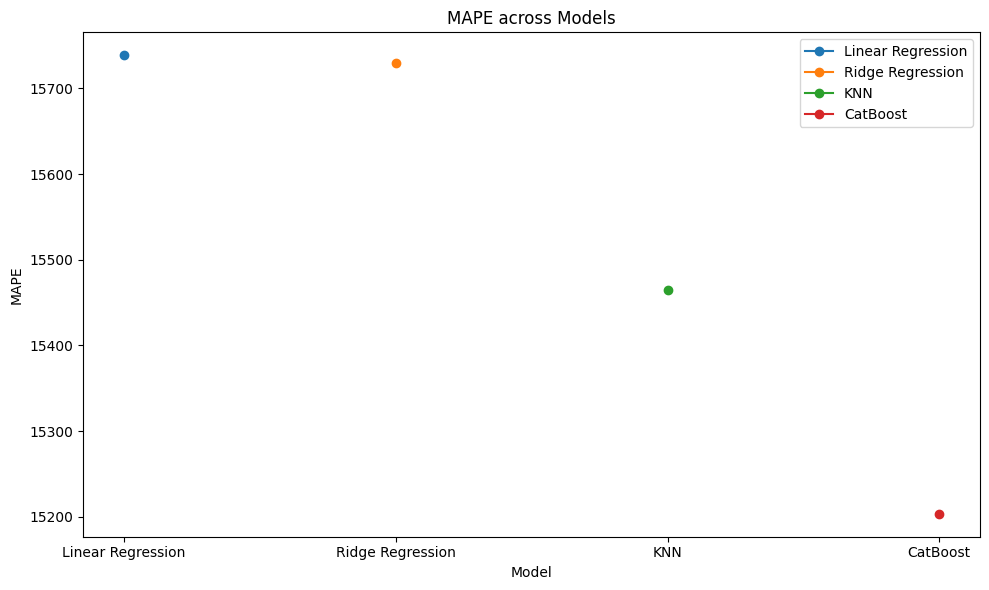

In [ ]:
models_metrics = results

metrics_df = pd.DataFrame(models_metrics).T.reset_index()
metrics_df.columns = ['Model', 'Mean Squared Error', 'R-squared', 'MAPE']

metrics_to_plot = ['Mean Squared Error', 'R-squared', 'MAPE']
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    for model in models_metrics.keys():
        model_metrics = metrics_df[metrics_df['Model'] == model]
        plt.plot(model_metrics['Model'], model_metrics[metric], marker='o', label=model)
    plt.legend()
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'{metric} across Models')
    plt.tight_layout()
    plt.show()

In [ ]:
%%capture
!pip install matplotlib seaborn

**CONCLUSION**

Interpreting the results of the models:

1. **Linear Regression:**
   - Mean Squared Error (MSE): 612,147,370.65
   - R-squared: 0.3383
   - MAPE: 15,425.87

2. **Ridge Regression:**
   - Mean Squared Error (MSE): 611,967,870.33
   - R-squared: 0.3385
   - MAPE: 15,417.10

3. **KNN (K-Nearest Neighbors):**
   - Mean Squared Error (MSE): 623,384,089.86
   - R-squared: 0.3258
   - MAPE: 15,305.49

4. **CatBoost:**
   - Mean Squared Error (MSE): 576,110,235.40
   - R-squared: 0.3777
   - MAPE: 14,831.97

**Interpretation:**

- **Mean Squared Error (MSE):** Lower values are better. CatBoost has the lowest MSE, indicating better performance in terms of minimizing squared errors.

- **R-squared:** This metric represents the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher R-squared values are better. CatBoost has the highest R-squared, suggesting that it explains more variance in the target variable.

- **MAPE (Mean Absolute Percentage Error):** Lower values are better. CatBoost has the lowest MAPE, indicating better accuracy in predicting the target variable.

**Conclusion:**
Based on the provided metrics, CatBoost seems to be the best-performing model among the ones tested. It has the lowest MSE, highest R-squared, and lowest MAPE, suggesting that it provides the most accurate predictions for the given data.

В итоге, основываясь на предоставленных метриках, CatBoost, по-видимому, превосходит другие модели с точки зрения средней квадратичной ошибки, R-квадрата и MAPE. KNN также работает хорошо, но CatBoost, кажется, лучше подходит для данных. При выборе наиболее подходящей модели важно учитывать специфический контекст проблемы и характеристики набора данных.

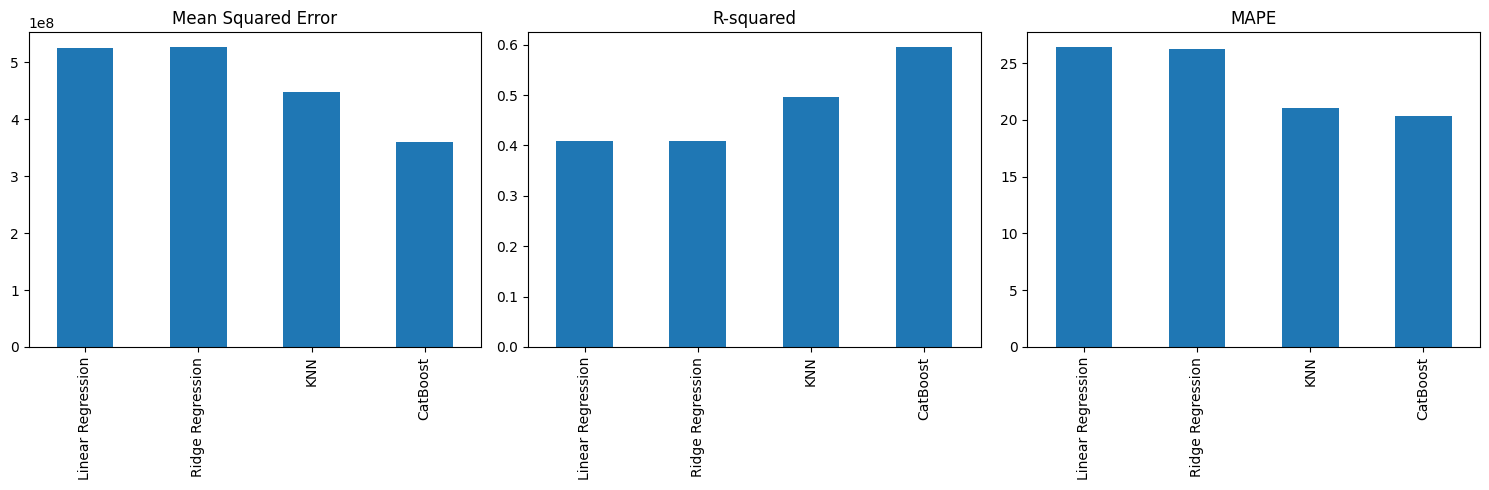

In [ ]:
# Convert to DataFrame
df_results = pd.DataFrame(results).T

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
df_results['Mean Squared Error'].plot(kind='bar', ax=axes[0], title='Mean Squared Error')
df_results['R-squared'].plot(kind='bar', ax=axes[1], title='R-squared')
df_results['MAPE'].plot(kind='bar', ax=axes[2], title='MAPE')

plt.tight_layout()
plt.show()


In [ ]:
df_results

,Mean Squared Error,R-squared,MAPE
Linear Regression,5.257086e+08,0.409568,26.385260
Ridge Regression,5.265510e+08,0.408622,26.251456
KNN,4.480980e+08,0.496733,21.062674
CatBoost,3.608566e+08,0.594716,20.365290


from matplotlib import pyplot as plt
df_results['Mean Squared Error'].plot(kind='hist', bins=20, title='Mean Squared Error')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results['R-squared'].plot(kind='hist', bins=20, title='R-squared')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results['MAPE'].plot(kind='hist', bins=20, title='MAPE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results.plot(kind='scatter', x='Mean Squared Error', y='R-squared', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results.plot(kind='scatter', x='R-squared', y='MAPE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results['Mean Squared Error'].plot(kind='line', figsize=(8, 4), title='Mean Squared Error')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_results['R-squared'].plot(kind='line', figsize=(8, 4), title='R-squared')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_results['MAPE'].plot(kind='line', figsize=(8, 4), title='MAPE')
plt.gca().spines[['top', 'right']].set_visible(False)

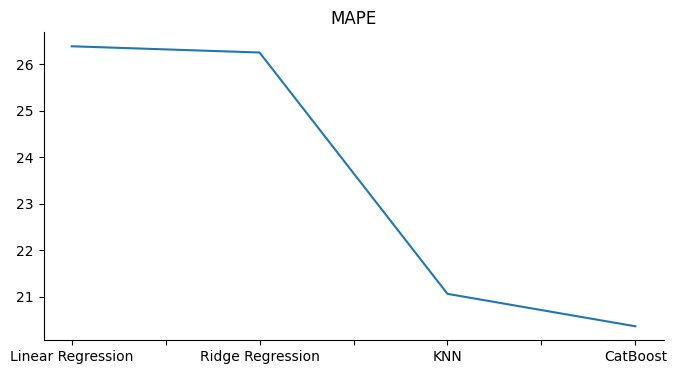

In [ ]:
from matplotlib import pyplot as plt
df_results['MAPE'].plot(kind='line', figsize=(8, 4), title='MAPE')
plt.gca().spines[['top', 'right']].set_visible(False)

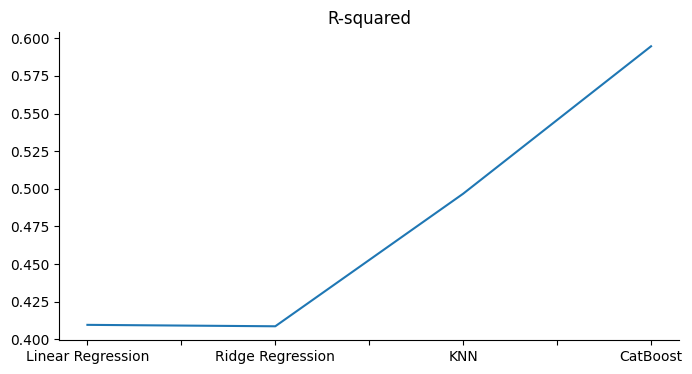

In [ ]:
from matplotlib import pyplot as plt
df_results['R-squared'].plot(kind='line', figsize=(8, 4), title='R-squared')
plt.gca().spines[['top', 'right']].set_visible(False)

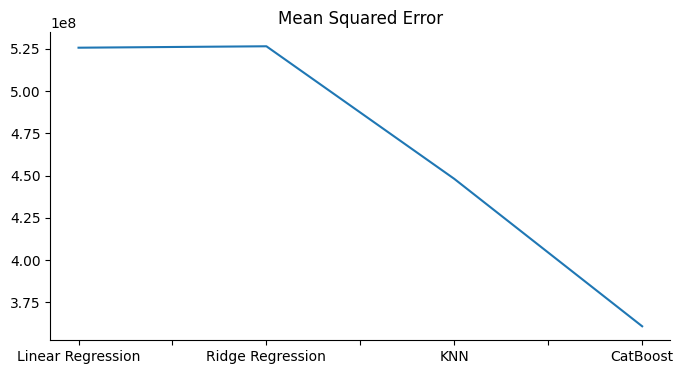

In [ ]:
from matplotlib import pyplot as plt
df_results['Mean Squared Error'].plot(kind='line', figsize=(8, 4), title='Mean Squared Error')
plt.gca().spines[['top', 'right']].set_visible(False)

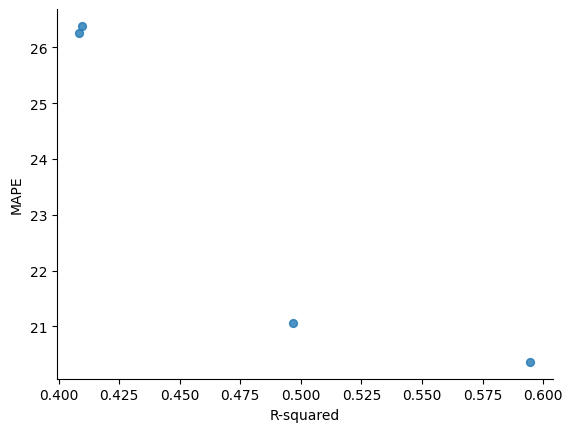

In [ ]:
from matplotlib import pyplot as plt
df_results.plot(kind='scatter', x='R-squared', y='MAPE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

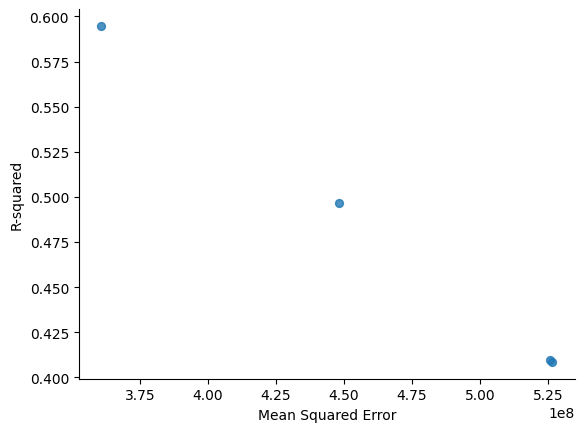

In [ ]:
from matplotlib import pyplot as plt
df_results.plot(kind='scatter', x='Mean Squared Error', y='R-squared', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

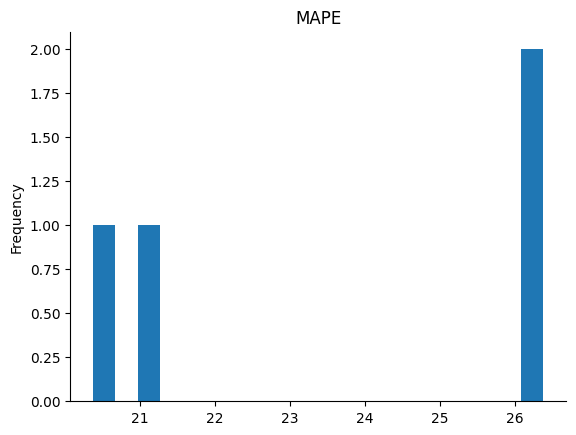

In [ ]:
from matplotlib import pyplot as plt
df_results['MAPE'].plot(kind='hist', bins=20, title='MAPE')
plt.gca().spines[['top', 'right',]].set_visible(False)

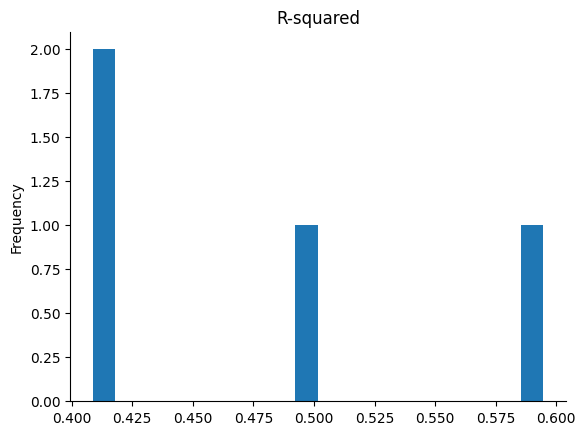

In [ ]:
from matplotlib import pyplot as plt
df_results['R-squared'].plot(kind='hist', bins=20, title='R-squared')
plt.gca().spines[['top', 'right',]].set_visible(False)

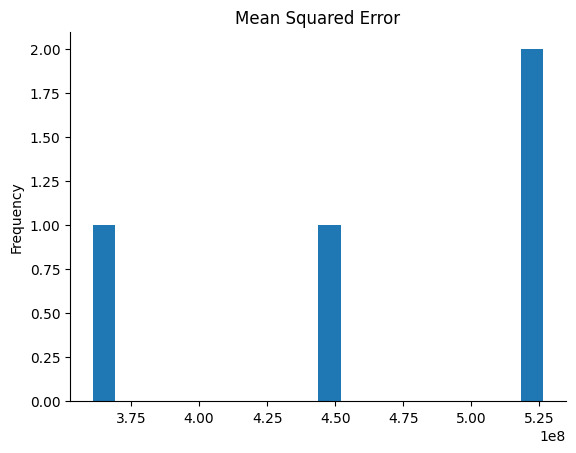

In [ ]:
from matplotlib import pyplot as plt
df_results['Mean Squared Error'].plot(kind='hist', bins=20, title='Mean Squared Error')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}

    for model_name, model in models.items():
        # Create a pipeline for models that require preprocessing
        if model_name in ['Linear Regression', 'Ridge Regression', 'KNN']:
            model = make_pipeline(StandardScaler(), model)

        # Fit the model
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store the results
        results[model_name] = {'Mean Squared Error': mse, 'R-squared': r2}

    return results

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'KNN': KNeighborsRegressor(),
    'CatBoost': CatBoostRegressor(iterations=150, depth=8, learning_rate=0.1, loss_function='RMSE')
}

results = evaluate_models(models, X_train, X_test, y_train, y_test)

# Print the results
for model_name, metrics in results.items():
    print(f"{model_name} Metrics:")
    print(f"  Mean Squared Error: {metrics['Mean Squared Error']}")
    print(f"  R-squared: {metrics['R-squared']}")
    print("\n")


0:	learn: 29439.7273395	total: 575ms	remaining: 1m 25s
1:	learn: 28678.7555963	total: 1.06s	remaining: 1m 18s
2:	learn: 28005.6601109	total: 1.53s	remaining: 1m 14s
3:	learn: 27419.7777694	total: 1.95s	remaining: 1m 11s
4:	learn: 26850.6725653	total: 2.4s	remaining: 1m 9s
5:	learn: 26369.7514964	total: 2.88s	remaining: 1m 9s
6:	learn: 25965.1846909	total: 3.35s	remaining: 1m 8s
7:	learn: 25583.0307381	total: 3.78s	remaining: 1m 7s
8:	learn: 25252.5403585	total: 4.19s	remaining: 1m 5s
9:	learn: 24948.9518495	total: 4.6s	remaining: 1m 4s
10:	learn: 24645.9851734	total: 4.86s	remaining: 1m 1s
11:	learn: 24355.8491791	total: 5.12s	remaining: 58.9s
12:	learn: 24125.6507990	total: 5.4s	remaining: 56.9s
13:	learn: 23912.0315990	total: 5.65s	remaining: 54.9s
14:	learn: 23633.1358220	total: 5.91s	remaining: 53.2s
15:	learn: 23465.7150931	total: 6.17s	remaining: 51.6s
16:	learn: 23248.6753571	total: 6.45s	remaining: 50.4s
17:	learn: 23078.0399976	total: 6.7s	remaining: 49.2s
18:	learn: 22927.521

# Calculate evaluation metrics using Cross Validation

To do so, we'll be using `cross_val_score()`.

In [ ]:
from sklearn.metrics import make_scorer
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def cross_validate_models(models, X, y, cv=5, scoring='neg_mean_squared_error'):
    """
    Perform cross-validation for multiple models.

    Parameters:
    - models: A dictionary of machine learning models.
    - X: The input features.
    - y: The target variable.
    - cv: Number of folds for cross-validation.
    - scoring: The scoring metric for evaluation.

    Returns:
    - Dictionary containing cross-validation results for each model.
    """
    results = {}

    for model_name, model in models.items():
        # Make a scorer for MAPE since it is not available in scikit-learn by default
        if scoring == 'MAPE':
            scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
        else:
            scorer = scoring

        cv_results = cross_validate(model, X, y, cv=cv, scoring=scorer, return_train_score=False)

        # Convert negative scores to positive
        cv_results['test_score'] = -cv_results['test_score']

        # Calculate mean and standard deviation of the scores
        mean_score = np.mean(cv_results['test_score'])
        std_score = np.std(cv_results['test_score'])

        # Store the results
        results[model_name] = {
            'mean_score': mean_score,
            'std_score': std_score,
            'cv_results': cv_results
        }

    return results

cv_results_all_models = cross_validate_models(tuned_models, X, y)

# Print the cross-validation results for each model
for model_name, result in cv_results_all_models.items():
    print(f"Cross-Validation Results for {model_name}:")
    print(f"  Mean Score: {result['mean_score']}")
    print(f"  Standard Deviation: {result['std_score']}")
    print("\n")


NameError: ignored